# COMP4131 - Data Modelling and Analysis - Lab 5
# Data Analysis and Modelling

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*In addition, this notebook also contains an excerpt from the [ Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://homl.info/er3) by Aurélien Géron; the content is available [on GitHub](https://github.com/ageron/handson-ml3).*

# Unsupervised Learning

# Clustering

First, let's import a few common modules.

In [87]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In this lab, we will try clustering with the iris dataset. Let us load the dataset. Then, we will plot the data distribution with and without the label.

In [88]:
from sklearn.datasets import load_iris

In [89]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [90]:
print(X.shape)
print(y.shape)
X       # 4 attributes: sepal length, sepal width, petal length, petal width

(150, 4)
(150,)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

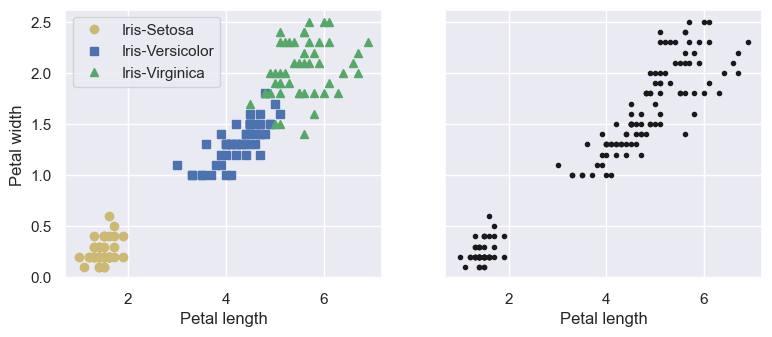

In [91]:
plt.figure(figsize=(9, 3.5))

plt.subplot(1,2,1)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris-Setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris-Versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris-Virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)

plt.show()

## K-Means

The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest. Let us try to perform clustering on Iris dataset using K-Means algorithm.

In [92]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
y_pred = kmeans.predict(X)
mapping = np.array([2, 0, 1])       # 映射到正确的分类上
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

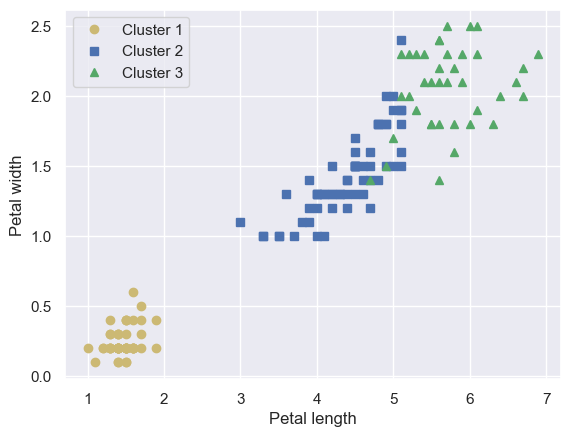

In [93]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.show()

In [94]:
np.sum(y_pred==y)

np.int64(133)

In [95]:
np.sum(y_pred==y) / len(y_pred)     # accuracy

np.float64(0.8866666666666667)

### Inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the _inertia_ metric:

In [96]:
kmeans.inertia_

78.8556658259773

As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid. To determine the best number of k, we can use Elbow method.

In [97]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 6)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[681.3706,
 152.3479517603579,
 78.8556658259773,
 57.35088021295475,
 46.472230158730156]

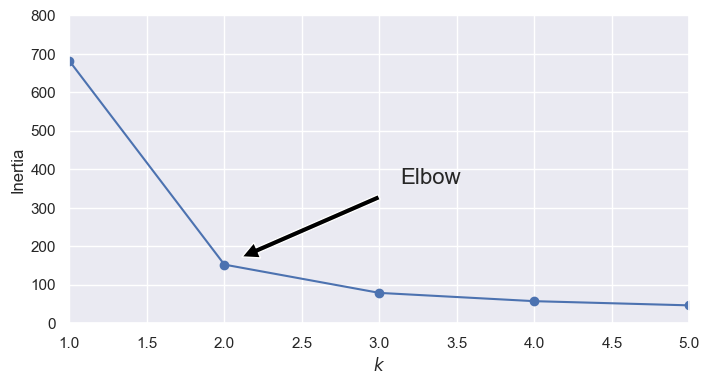

In [98]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 6), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.5, 0.5),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 5, 0, 800])
plt.show()

As you can see, there is an elbow at  𝑘=2 , which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So  𝑘=2  is a pretty good choice. 

## Gaussian Mixture Model

A Gaussian mixture model can actually separate these clusters pretty well (using all 4 features: petal length & width, and sepal length & width).

In [99]:
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture(n_components=3, random_state=42)
GMM.fit(X)
y_pred = GMM.predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

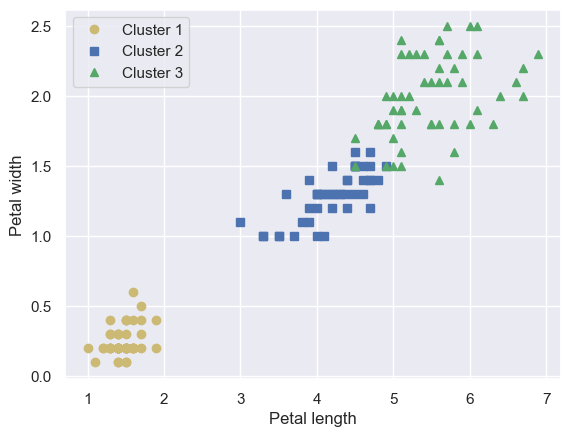

In [100]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.show()

In [101]:
np.sum(y_pred==y)

np.int64(145)

In [102]:
np.sum(y_pred==y) / len(y_pred)

np.float64(0.9666666666666667)

# Anomaly Detection (k-means)

Clustering via k-means can be used as an anomaly detection method by:

  1. generating clusters, 
  2. finding the cluster of each example, 
  3. using the distance from the example to its cluster's center as a score
  
These pieces are available using `KMeans` which after fitting and predicting to get the clusters -- both where the clusters are and what cluster an example belongs to -- provides a `cluster_centers_` attribute.  Then we can use numpy's `numpy.linalg.norm` to compute distances for us.

We will start by generating some data, then showing what the clusters are, and finally scoring the anomalies. 

**Data generation and view**

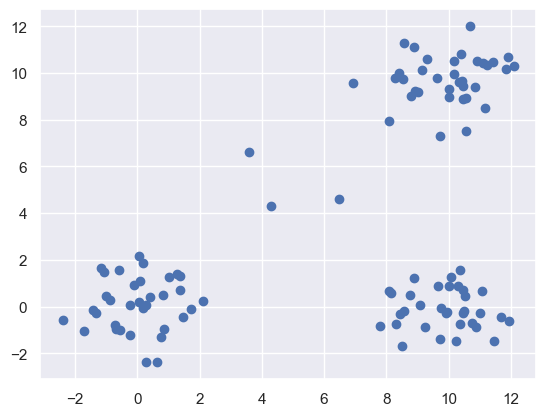

In [103]:
import sklearn.datasets as sk_data

# 生成数据和异常值
blobs_X, cluster_labels = sk_data.make_blobs(centers=[[0,0], [10,10], [10,0]])      # make_blobs 默认生成100个sample
anomalies, _ = sk_data.make_blobs(centers=[[5,5]], n_samples=5, cluster_std=3, random_state=42)

# 合并在一起
data = np.concatenate([blobs_X, anomalies])
cluster_labels = np.concatenate([cluster_labels, [-1]*len(anomalies)])

# Display the data before clustering
plt.plot(data[:, 0], data[:, 1], 'o')
plt.show()

**Clustering and show cluster assignment**

**Tasks:** Complete the following steps using KMeans clustering

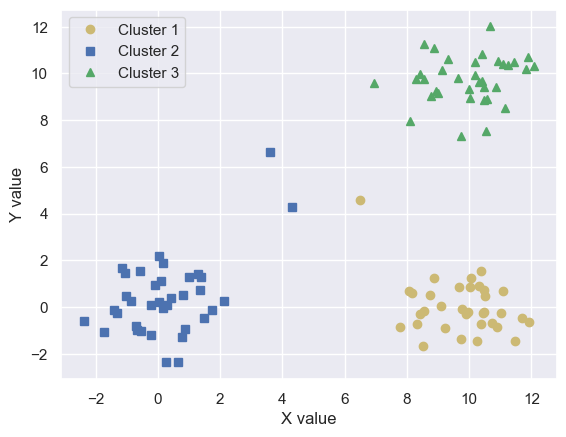

In [104]:
# Step 1: Import kmeans from sklearn
from sklearn.cluster import KMeans

# Step 2: Initialize the KMeans algorithm with 3 clusters and assign it to variable 'kmeans'
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)


# Step 3: Fit the model to the data
kmeans.fit(data)

# Step 4: Predict the cluster labels for each data point
y_pred = kmeans.predict(data)

# Step 5: Plot the clustered data with different colors for each cluster
plt.plot(data[y_pred==0, 0], data[y_pred==0, 1], "yo", label="Cluster 1")
plt.plot(data[y_pred==1, 0], data[y_pred==1, 1], "bs", label="Cluster 2")
plt.plot(data[y_pred==2, 0], data[y_pred==2, 1], "g^", label="Cluster 3")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.legend(loc="upper left")
plt.show()


You should run the clustering several times and note that the assignment of some points changes due to the different initial conditions (random choice of starting centroids).

**For each point, find the distance from the point to its centroid**

In [105]:
centers = kmeans.cluster_centers_[y_pred]
centers[:10]

array([[0.24561361, 0.41518042],
       [9.97469356, 9.74919858],
       [9.97469356, 9.74919858],
       [9.74893639, 0.03632837],
       [9.74893639, 0.03632837],
       [9.97469356, 9.74919858],
       [9.74893639, 0.03632837],
       [9.97469356, 9.74919858],
       [9.74893639, 0.03632837],
       [9.97469356, 9.74919858]])

In [106]:
score = np.linalg.norm(data - centers, axis=1)
score

array([1.77897401, 1.01817359, 2.36910631, 1.41734913, 0.65948938,
       1.21229825, 1.04788285, 0.36642671, 0.11570274, 1.16996835,
       1.40919161, 2.81563564, 1.25396289, 1.299183  , 0.99256549,
       1.91420796, 1.68282465, 1.14890197, 1.10427458, 0.87687638,
       0.92107171, 2.19783732, 1.66128199, 1.07874986, 2.15235608,
       0.29010064, 0.78771408, 0.45814744, 1.57914734, 1.50204757,
       0.77238116, 0.41523097, 1.26015726, 1.67898177, 1.1245998 ,
       1.15868187, 1.4245166 , 0.93654285, 1.58793878, 1.45226627,
       1.8742343 , 1.48058172, 1.79677977, 2.59962523, 1.12656893,
       1.7620032 , 2.10764223, 0.57752382, 1.20346103, 2.45217387,
       1.4390297 , 1.70301707, 1.73963223, 1.39874487, 1.69068933,
       1.45989198, 1.64271411, 1.46669887, 0.58377496, 0.33282715,
       0.787688  , 0.35622552, 0.6092287 , 2.29388888, 0.87717818,
       0.76325957, 1.62404851, 2.81493905, 0.99693171, 1.54628776,
       1.63601291, 1.40851086, 1.30763578, 0.33458819, 1.72226

What are the 5 points with the highest scores? We will call those the anomalies

In [107]:
anomaly_idx = np.argsort(score)[::-1][:5]
anomaly_idx

array([102, 100, 103, 101,  11])

Show these results in a plot that includes the cluster centers (labeled with an 'x')

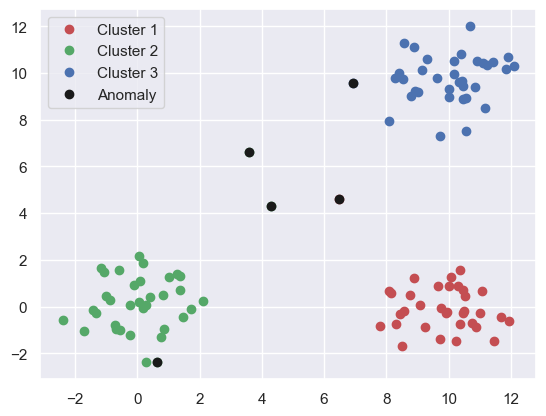

In [108]:
plt.plot(data[y_pred==0, 0], data[y_pred==0, 1], "ro", label="Cluster 1")
plt.plot(data[y_pred==1, 0], data[y_pred==1, 1], "go", label="Cluster 2")
plt.plot(data[y_pred==2, 0], data[y_pred==2, 1], "bo", label="Cluster 3")

plt.plot(data[anomaly_idx, 0], data[anomaly_idx, 1], marker='o', linestyle='none',
         color='k', label='Anomaly')
plt.legend()
plt.show()

If you rerun the clustering enough times, you will find that the three central points are always labeled as anomalies. The other two anomalies vary depending on how the points are clustered.

# Anomaly Detection (Gaussian Mixture Model)

k-means is a hard clustering method. Let us try clustering using a soft clustering method - Gaussian Mixture Model (GMM).

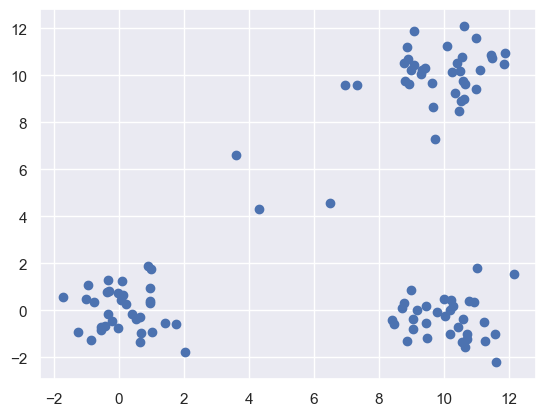

In [109]:
import sklearn.datasets as sk_data

blobs_X, cluster_labels = sk_data.make_blobs(centers=[[0,0], [10,10], [10,0]])
anomalies, _ = sk_data.make_blobs(centers=[[5,5]], n_samples=5, cluster_std=3, random_state=42)

data = np.concatenate([blobs_X, anomalies])
cluster_labels = np.concatenate([cluster_labels, [-1]*len(anomalies)])

# Display the data before clustering
plt.plot(data[:, 0], data[:, 1], 'o')
plt.show()

**Tasks:** Complete the following steps using Gaussian Mixture Model

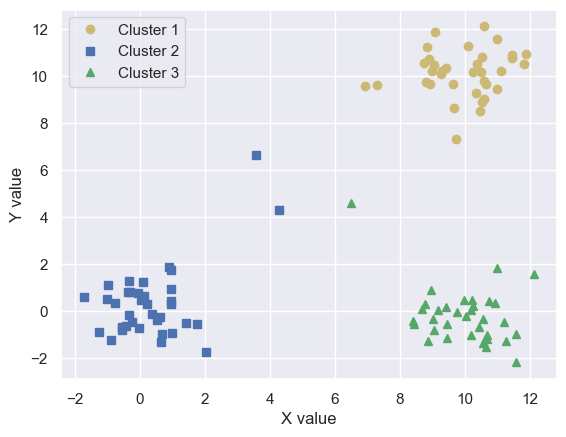

In [110]:
# Step 1: Import Gaussian Mixture Model from sklearn
from sklearn.mixture import GaussianMixture

# Step 2: Initialize the Gaussian Mixture Model algorithm with 3 clusters and assign it to variable 'GMM'
GMM = GaussianMixture(n_components=3, random_state=42)

# Step 3: Fit the model to the data
GMM.fit(data)

# Step 4: Predict the cluster labels for each data point
y_pred = GMM.predict(data)

# Step 5: Plot the clustered data with different colors for each cluster
plt.plot(data[y_pred==0, 0], data[y_pred==0, 1], "yo", label="Cluster 1")
plt.plot(data[y_pred==1, 0], data[y_pred==1, 1], "bs", label="Cluster 2")
plt.plot(data[y_pred==2, 0], data[y_pred==2, 1], "g^", label="Cluster 3")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.legend(loc="upper left")
plt.show()

In [111]:
scores = GMM.score_samples(data)

In [112]:
thresh = np.percentile(scores, 4) 
print(thresh) 

-7.30210059920393


In [113]:
anomaly_idx = np.array(np.where(scores <= thresh))[0]
anomaly_idx

array([ 62,  95, 100, 102, 103])

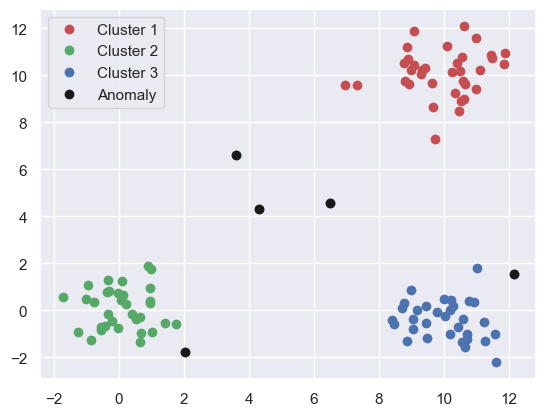

In [114]:
plt.plot(data[y_pred==0, 0], data[y_pred==0, 1], "ro", label="Cluster 1")
plt.plot(data[y_pred==1, 0], data[y_pred==1, 1], "go", label="Cluster 2")
plt.plot(data[y_pred==2, 0], data[y_pred==2, 1], "bo", label="Cluster 3")

plt.plot(data[anomaly_idx, 0], data[anomaly_idx, 1], marker='o', linestyle='none',
         color='k', label='Anomaly')
plt.legend()
plt.show()

## Introducing Principal Component Analysis

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data. Its behavior is easiest to visualize by looking at a two-dimensional dataset. Consider the following 200 points:

In [115]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

(200, 2)


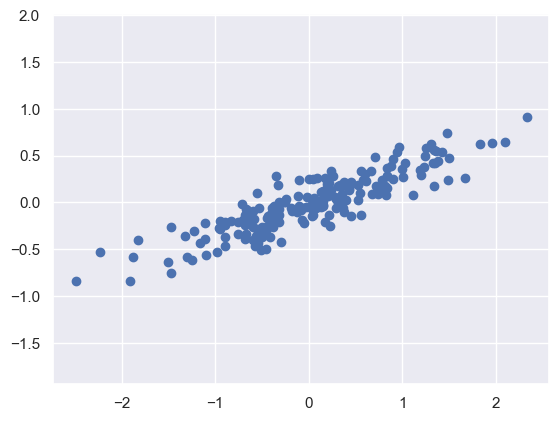

In [116]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
print(X.shape)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

By eye, it is clear that there is a nearly linear relationship between the x and y variables. The unsupervised learning problem attempts to learn about the *relationship* between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.
Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [118]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [119]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

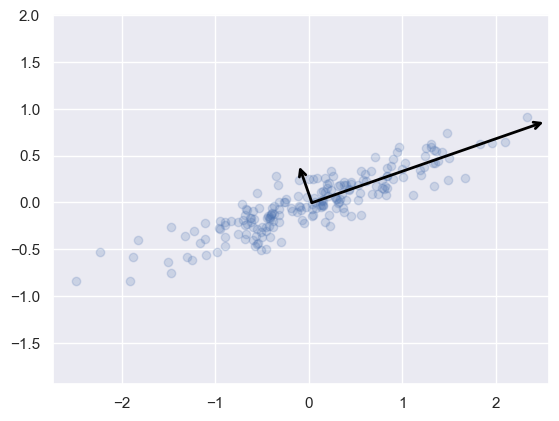

In [120]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,
                    color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.show()

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "principal components" of the data.

This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

### PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.

We start by loading the data:

In [121]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

The data consists of 8×8 pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [122]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

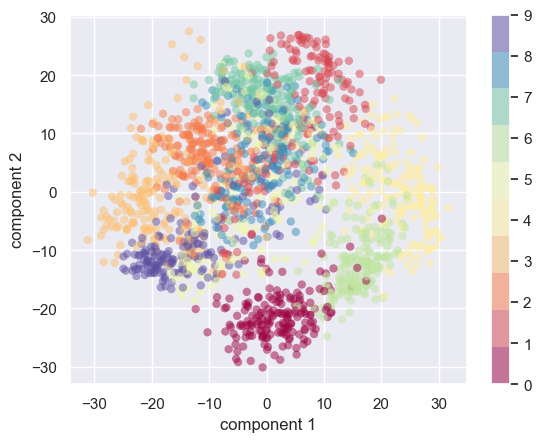

In [123]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.get_cmap('Spectral', 10))  # Use 'Spectral' instead of 'spectral'
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()      # 显示颜色条
plt.show()

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

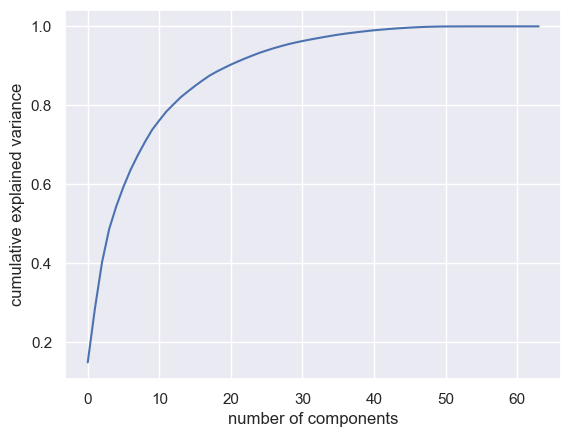

In [124]:
pca = PCA().fit(digits.data)        # 只进行拟合 不进行降维
plt.plot(np.cumsum(pca.explained_variance_ratio_))  # 计算累计和，用于累加每个主成分的方差贡献度
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

### Tasks: PCA for Dimensionality Reduction and Visualization

In this task, we will apply PCA to the **Wine dataset** and visualize the transformed data in **2D and 3D**.

The **Wine dataset** consists of **178 samples** with **13 numerical features** representing different chemical properties of wines from **three different cultivars** (target classes).

### Instructions

#### 1. Load the Dataset
- Use `sklearn.datasets.load_wine` to load the Wine dataset.
- Extract the feature matrix `X` and target labels `y`.

#### 2. Standardize the Features
- PCA is sensitive to the scale of data, so normalize `X` using `StandardScaler` from `sklearn.preprocessing`.

#### 3. Apply PCA
- Reduce the dimensionality of the dataset from **13** to **2** using `PCA(n_components=2)`.

#### 4. Visualize the Results
- Create a **scatter plot** of the transformed **2D features**.
- Color the points based on the **wine class (`y`)**.
- Label the axes as **PC1** and **PC2**.

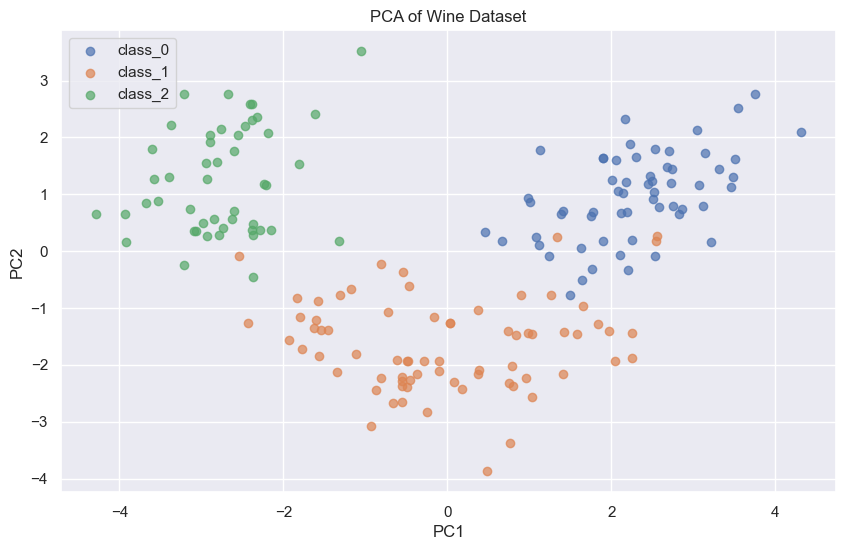

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target labels
target_names = wine.target_names  # Class names

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA to reduce to 2 components
pca_2 = PCA(n_components=2)

# Step 4: Call the .fit_transform on standardized data, assign it to variable 'X_pca'
X_pca = pca_2.fit_transform(X_scaled)

# Step 5: Visualize the PCA result
plt.figure(figsize=(10, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name, alpha=0.7)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Wine Dataset')
plt.legend()
plt.grid(True)
plt.show()


In [126]:
# Apply PCA to reduce to 3D
pca_3 = PCA(n_components=3)

# Call the .fit_transform on standardized data, assign it to variable 'X_pca_3d'
X_pca_3d = pca_3.fit_transform(X_scaled)


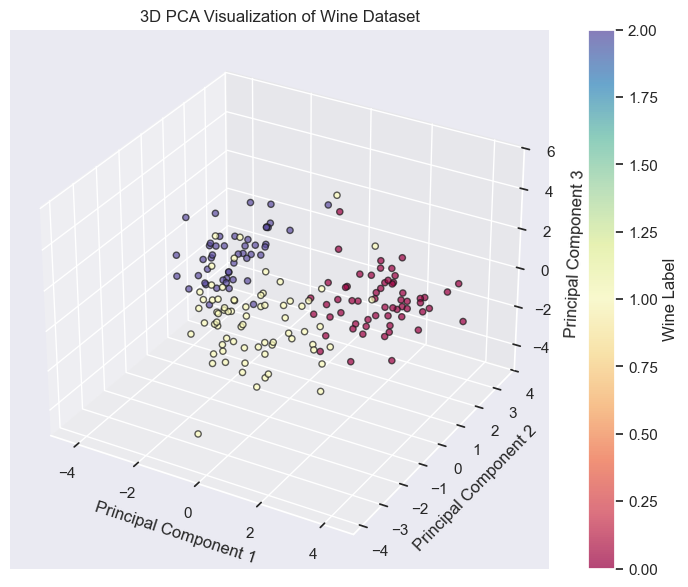

In [127]:
# 3D Scatter plot of PCA results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='Spectral', alpha=0.7, edgecolors='k')

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Visualization of Wine Dataset')
fig.colorbar(scatter, label='Wine Label')

plt.show()